In [30]:
%matplotlib notebook

In [31]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [32]:
# Import the Boston housing data set and get description
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

housing_data['MEDV'] = boston_dataset.target
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [housing_data.sample(div) for x in range(0,nsamples)]
samples

[         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
 358   5.20177   0.0  18.10   1.0  0.770  6.127   83.4  2.7227  24.0  666.0   
 299   0.05561  70.0   2.24   0.0  0.400  7.041   10.0  7.8278   5.0  358.0   
 262   0.52014  20.0   3.97   0.0  0.647  8.398   91.5  2.2885   5.0  264.0   
 82    0.03659  25.0   4.86   0.0  0.426  6.302   32.2  5.4007   4.0  281.0   
 398  38.35180   0.0  18.10   0.0  0.693  5.453  100.0  1.4896  24.0  666.0   
 103   0.21161   0.0   8.56   0.0  0.520  6.137   87.4  2.7147   5.0  384.0   
 403  24.80170   0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
 369   5.66998   0.0  18.10   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
 292   0.03615  80.0   4.95   0.0  0.411  6.630   23.4  5.1167   4.0  245.0   
 218   0.11069   0.0  13.89   1.0  0.550  5.951   93.8  2.8893   5.0  276.0   
 242   0.10290  30.0   4.93   0.0  0.428  6.358   52.9  7.0355   6.0  300.0   
 175   0.06664   0.0   4.05   0.0  0.510  6.546   33

In [35]:
# Calculate means
means = [s.MEDV.mean() for s in samples]
print(means)
# Calculate standard error on means
sems = [sem(s.MEDV) for s in samples]
print(sems)


[24.695, 20.505000000000003, 21.32999999999999, 25.295, 21.084999999999997, 19.645000000000003, 23.554999999999996, 22.0, 25.785000000000004, 22.759999999999998, 25.360000000000007, 22.845000000000002, 19.665, 20.575000000000003, 22.29, 22.145000000000003, 23.76, 20.864999999999995, 22.205000000000005, 22.324999999999996, 18.495000000000005, 25.055, 24.59, 20.285, 26.814999999999998]
[2.612515172456571, 1.7635113746219648, 1.8477881514479897, 2.095502389203576, 2.1978012337693085, 2.463357518339125, 2.94116406421532, 2.244783426430921, 2.0124909283875305, 2.538600940841649, 1.948905225747873, 2.4019342534496517, 1.2922700345149474, 1.8322530708909925, 1.4018765618758458, 1.983132490199334, 2.3957901674219695, 2.2504417694965437, 2.0271119591026148, 2.141689876316314, 1.9717942003213853, 1.8893395532218182, 1.8741440151369595, 1.2674731389243468, 2.584460393644249]


<IPython.core.display.Javascript object>


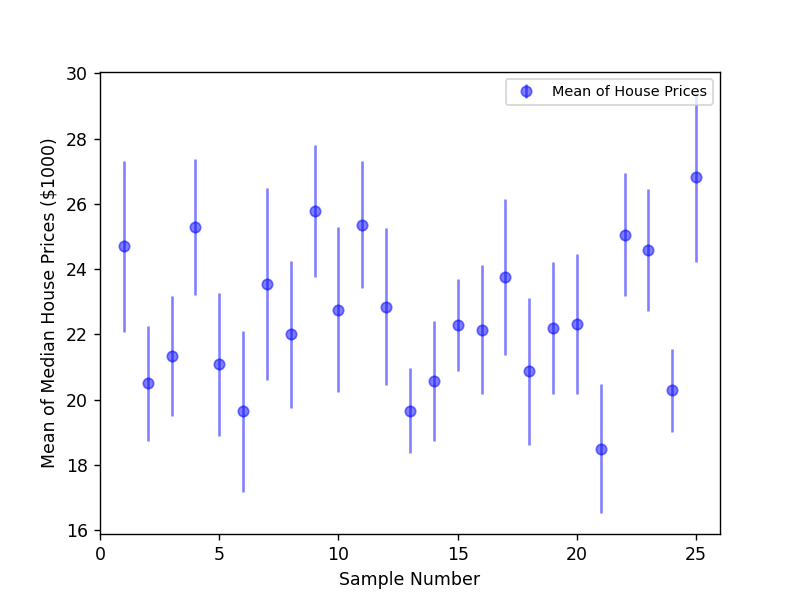

In [36]:
# Plot sample means with error bars
fig,ax=plt.subplots()
ax.errorbar((np.arange(0, len(samples), 1)+1),means,yerr=sems, fmt="o", color="b",alpha=0.5, label="Mean of House Prices")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices ($1000)")


plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [37]:
# Calculate the range of SEM values
sem_range = max(sems) - min(sems)
sem_range

1.673690925290973

In [38]:
# Determine which sample's mean is closest to the population mean
samp_index = sems.index(min(sems))+1
samp_index

24

In [39]:
# Compare to the population mean
print(samples[samp_index].MEDV.mean())
print(housing_data.MEDV.mean())


26.814999999999998
22.532806324110698
